In [ ]:

from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling1D,Flatten,SpatialDropout1D,Bidirectional,LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import model_selection
from matplotlib import pyplot
import seaborn as sns
def metrics(expected , predicted):
  # Mean absolute error
  print("The rmse is " + str(np.sqrt(mean_squared_error(expected, predicted))))
  print("The mae is " + str(mean_absolute_error(expected, predicted)))
  print("The r2 is " + str(r2_score(expected, predicted)))
  print("Standard Deviation of predicted" + str(np.std(predicted)))
  plt.figure()
  ax1 = sns.distplot(predicted)
  ax2 = sns.distplot(expected)
  plt.axvline(np.mean(predicted) , color='b' , linestyle='dashed' , linewidth='2')
  plt.axvline(np.mean(expected) , color='orange' , linestyle='dashed' , linewidth='2')
  # pyplot.plot(err)
  # pyplot.xticks(ticks=[i for i in range(len(err))], labels=predicted)
  # pyplot.xlabel('Predicted Value')
  # pyplot.ylabel('Mean Squared Error')
  # pyplot.show()
  # mean sq error
  # r2


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-02-25 13:43:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-02-25 13:43:35--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-02-25 13:43:35--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [5]:
!unzip "/content/glove.6B.zip" -d "/content/"

Archive:  /content/glove.6B.zip
replace /content/glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
!wget https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2018_iclr.csv
!wget https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2019_iclr.csv
!wget https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2021_iclr.csv

--2022-02-25 14:01:38--  https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2018_iclr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7596883 (7.2M) [text/plain]
Saving to: ‘2018_iclr.csv’

2018_iclr.csv       100%[===================>]   7.24M  --.-KB/s    in 0.08s   

2022-02-25 14:01:38 (87.1 MB/s) - ‘2018_iclr.csv’ saved [7596883/7596883]

--2022-02-25 14:01:38--  https://raw.githubusercontent.com/krishnaaxo/Rev.Conf/main/2019_iclr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13121594 (13M) [text/plain]
Savi

In [7]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [8]:
df = pd.read_csv('2021_iclr.csv')
df['confidence'] = df['confidence'].astype(str).str[0]
df['review'] = df['review']
review = df[['confidence','review']]
review = review.dropna(axis=0)

In [9]:
review['confidence'] = review['confidence'].astype(int) -1

In [10]:
review

,confidence,review
0,3,Review:\n\nThis paper carries out a large-scal...
1,2,Review:\n\n###################################...
2,2,Review:\n\nThe authors survey a wide variety o...
3,3,Review:\n\nThe paper presents an empirical eva...
4,3,"Review:\n\nIn general, it is not clear, at lea..."
...,...,...
3285,2,Review:\n\nAuthors have presented a method to ...
3286,2,Review:\n\nThis paper questions the omnipresen...
3287,3,Review:\n\nSummary: This paper compares the mo...
3288,3,Review:\n\nThe paper compares cross-entropy an...


In [11]:
df=review
df.head()

,confidence,review
0,3,Review:\n\nThis paper carries out a large-scal...
1,2,Review:\n\n###################################...
2,2,Review:\n\nThe authors survey a wide variety o...
3,3,Review:\n\nThe paper presents an empirical eva...
4,3,"Review:\n\nIn general, it is not clear, at lea..."


In [12]:
reviews = list(df['review'])

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in tqdm(reviews):
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


100%|██████████| 3290/3290 [03:32<00:00, 15.51it/s]


In [14]:
embedding_dict={}
with open('/content/glove.6B.100d.txt','r') as f:
    for line in tqdm(f):
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

400000it [00:08, 45586.31it/s]


In [15]:
MAX_LEN=256
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [16]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 14990


In [22]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec
            

100%|██████████| 14990/14990 [00:00<00:00, 620443.25it/s]


In [17]:
y = df.iloc[:, 0].values
# y = label_binarize(y, classes=[1, 2, 3, 4, 5])
n_classes = 5

In [18]:
y

array([3, 2, 2, ..., 3, 3, 4])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweet_pad, y, test_size = 0.20, random_state = 0)

In [20]:
print(X_train.shape)
print(y_train.shape)

(2632, 256)
(2632,)


In [23]:
model = Sequential()
embedding=Embedding(num_words,100,embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Flatten())
model.add(Dense(1, kernel_initializer='normal', activation='relu'))
optimzer=Adam(learning_rate=1e-5)
    
model.compile(loss='mean_squared_error',optimizer=optimzer)     
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 100)          1499100   
                                                                 
 dense (Dense)               (None, 256, 128)          12928     
                                                                 
 dense_1 (Dense)             (None, 256, 64)           8256      
                                                                 
 dense_2 (Dense)             (None, 256, 32)           2080      
                                                                 
 dense_3 (Dense)             (None, 256, 16)           528       
                                                                 
 dense_4 (Dense)             (None, 256, 8)            136       
                                                                 
 flatten (Flatten)           (None, 2048)             

In [24]:
model.fit(X_train,y_train,batch_size=16,epochs=100)

Epoch 1/100
165/165 [==============================] - 3s 4ms/step - loss: 7.6840
Epoch 2/100
165/165 [==============================] - 1s 4ms/step - loss: 7.4828
Epoch 3/100
165/165 [==============================] - 1s 4ms/step - loss: 6.8915
Epoch 4/100
165/165 [==============================] - 1s 4ms/step - loss: 5.4292
Epoch 5/100
165/165 [==============================] - 1s 4ms/step - loss: 2.7688
Epoch 6/100
165/165 [==============================] - 1s 4ms/step - loss: 0.9255
Epoch 7/100
165/165 [==============================] - 1s 4ms/step - loss: 0.7428
Epoch 8/100
165/165 [==============================] - 1s 4ms/step - loss: 0.7341
Epoch 9/100
165/165 [==============================] - 1s 4ms/step - loss: 0.7273
Epoch 10/100
165/165 [==============================] - 1s 4ms/step - loss: 0.7192
Epoch 11/100
165/165 [==============================] - 1s 4ms/step - loss: 0.7130
Epoch 12/100
165/165 [==============================] - 1s 4ms/step - loss: 0.7056
Epoch 13/100


In [25]:
predicted = model.predict(X_test)

The rmse is 0.77594348500581
The mae is 0.6257172002256097
The r2 is 0.04636590530283402
Standard Deviation of predicted0.21584797
And for training values -------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


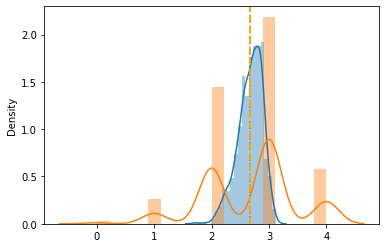

In [26]:
metrics(y_test , predicted)
print("And for training values -------------------")


The rmse is 0.7674953484368184
The mae is 0.6107091750598606
The r2 is 0.08715488262987525
Standard Deviation of predicted0.21873304


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


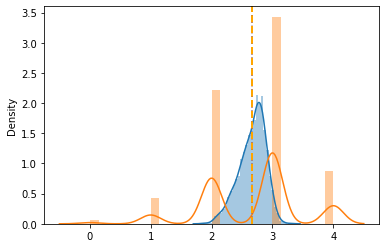

In [27]:
predicted2 = model.predict(X_train)
metrics(y_train , predicted2)